# **1. Librerías**

In [ ]:
# Para poder acceder a un archivo en Google Drive
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive

!pip install SimpleITK
!pip install pyradiomics

# Obtención del dataset
%cd /content/drive/My Drive/Bivlab/Datasets/PICAI_Consolidado/Copia_de_Consolidado_/

Mounted at /content/drive/
/content/drive/My Drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 8.2 MB/s eta 0

In [ ]:
import SimpleITK as sitk
import torch
import torch.nn as nn
import numpy as np
import os
import radiomics
import pandas as pd
import matplotlib.pyplot as plt
import json
import random

In [ ]:
from radiomics import getTestCase
from radiomics import featureextractor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from torchvision import models
from skimage.measure import label, regionprops
from matplotlib.patches import Rectangle

# **2. Dataset**

⚠️ <font color='magenta'>Modificar por su ruta personal para: **IA2_Copia_de_Consolidado_**</font>

In [ ]:
#Ubicación de la carpeta del dataset
dataDir = "/content/drive/My Drive/Proyecto_IA2/Dataset/IA2_Copia_de_Consolidado_/"

In [ ]:
#Importación
if os.path.exists(dataDir): # Verifica si el directorio existe
    directories = [d for d in os.listdir(dataDir) if os.path.isdir(os.path.join(dataDir, d))]
    print("Directories in the lecture-only drive:")
    for directory in directories:
        print(directory) # Imprime la lista de nombres de los subdirectorios (id de paciente)
else:
    print("The lecture drive path does not exist.")

Directories in the lecture-only drive:
10297_1000303
10118_1000118
10707_1000723
11065_1001087
10201_1000205
10370_1000376
10941_1000960
11309_1001332
10642_1000658
10147_1000149
11119_1001142
10071_1000071
11412_1001436
11234_1001257
10475_1000483
11093_1001116
10481_1000489
10502_1000511
10469_1000477
11199_1001222
11224_1001247
10228_1000232
10339_1000345
11081_1001103
10168_1000171
11402_1001426
11298_1001321
10880_1000896
10634_1000649
10061_1000061
10717_1000733
10793_1000809
10951_1000970
10924_1000941
11372_1001395
10493_1000502
10360_1000366
10211_1000215
10922_1000939
10196_1000200
10580_1000593
10582_1000596
11073_1001095
10345_1000351
11307_1001330
11374_1001397
11075_1001097
10108_1000108
10038_1000038
10762_1000778
10833_1000849
10063_1000063
11117_1001140
11115_1001138
10491_1000500
10213_1000217
11400_1001424
10953_1000972
11222_1001245
11156_1001179
10926_1000943
10705_1000721
10943_1000962
10936_1000953
10347_1000353
10467_1000475
11197_1001220
10547_1000558
10580_100

⚠️ <font color='magenta'>Modificar por su ruta personal para: **IA2_8x64x64-CIspheres.json**</font>

In [ ]:
# Ruta del archivo JSON
json_path = "/content/drive/My Drive/Proyecto_IA2/Dataset/IA2_8x64x64-CIspheres.json"

In [ ]:
# Dejar solo los pacientes que estén en el archivo JSON y tengan centroide

directorio_nuevo = []

with open(json_path, 'r') as file:
    data = json.load(file)

for directory in directories:
  directory_json = directory + "_000"
  if directory_json in data:
    centroide = data[directory_json].get("centroid")
    if centroide:
      directorio_nuevo.append(directory)

In [ ]:
print(f"Número de pacientes en el directorio anterior: {len(directories)}")
print(f"Número de pacientes en el directorio nuevo: {len(directorio_nuevo)}")

Número de pacientes en el directorio anterior: 1500
Número de pacientes en el directorio nuevo: 1067


In [ ]:
directorio_positivo = []

with open(json_path, 'r') as file:
    data = json.load(file)

for directory in directories:
  directory_json = directory + "_000"
  if directory_json in data:
    etiqueta = data[directory_json].get("label")
    if etiqueta != 0:
      directorio_positivo.append(directory)

for directory in directorio_positivo:
  print(directory)

10118_1000118
10707_1000723
10339_1000345
10168_1000171
10880_1000896
10211_1000215
10833_1000849
10953_1000972
10473_1000481
11063_1001085
10526_1000536
10539_1000549
10233_1000237
10808_1000824
11137_1001160
10043_1000043
11471_1001495
11428_1001452
10390_1000396
10380_1000386
10839_1000855
10048_1000048
11190_1001213
10121_1000121
10503_1000512
10398_1000404
11198_1001221
10451_1000459
11231_1001254
11130_1001153
11450_1001474
10895_1000911
11373_1001396
10078_1000078
10925_1000942
10885_1000901
11155_1001178
11299_1001322
10434_1000442
10220_1000224
10164_1000167
10626_1000640
10040_1000040
11385_1001409
10961_1000980
10901_1000917
10405_1000412
11074_1001096
11080_1001102
10338_1000344
10540_1000551
10604_1000618
10665_1000681
10304_1000310
11253_1001276
10699_1000715
11177_1001200
10670_1000686
11446_1001470
10607_1000621
10635_1000651
10798_1000814
10777_1000793
11462_1001486
10486_1000494
11448_1001472
10262_1000266
11229_1001252
10730_1000746
10012_1000012
11185_1001208
10059_

In [ ]:
directorio_negativo = []

with open(json_path, 'r') as file:
    data = json.load(file)

for directory in directories:
  directory_json = directory + "_000"
  if directory_json in data:
    etiqueta = data[directory_json].get("label")
    if etiqueta == 0:
      directorio_negativo.append(directory)

for directory in directorio_negativo:
  print(directory)

10297_1000303
11065_1001087
10370_1000376
10941_1000960
11309_1001332
10642_1000658
11119_1001142
10071_1000071
11412_1001436
11234_1001257
10475_1000483
10502_1000511
10469_1000477
11199_1001222
11224_1001247
11402_1001426
11298_1001321
10061_1000061
10793_1000809
10493_1000502
10196_1000200
10580_1000593
10345_1000351
11307_1001330
11374_1001397
11075_1001097
10108_1000108
10762_1000778
10491_1000500
10213_1000217
11222_1001245
11156_1001179
10926_1000943
10936_1000953
10347_1000353
10467_1000475
10580_1000594
10715_1000731
11232_1001255
10513_1000523
10226_1000230
10295_1000301
10800_1000816
10198_1000202
11410_1001434
11091_1001114
11364_1001387
11015_1001035
10028_1000028
11324_1001347
10820_1000836
11409_1001433
10223_1000227
10629_1000643
10367_1000373
10595_1000609
10187_1000190
10421_1000429
10452_1000460
11005_1001025
11209_1001232
11262_1001285
10764_1000780
10489_1000497
10750_1000766
11034_1001054
11180_1001203
10287_1000293
10858_1000874
10461_1000469
10091_1000091
11261_

In [ ]:
print(f"Número de pacientes positivos para cáncer: {len(directorio_positivo)}")
print(f"Número de pacientes negativos para cáncer: {len(directorio_negativo)}")

Número de pacientes positivos para cáncer: 220
Número de pacientes negativos para cáncer: 847


# **3. Obtención de centroide**

In [ ]:
def obtener_centroide(json_path, paciente_id):
    # Se carga el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    paciente_id_json = paciente_id + "_000"

    # Se verifica si el paciente se encuentra en el JSON
    if paciente_id_json in data:
        # Se obtienen las coordenadas del centroide
        centroide = data[paciente_id_json].get("centroid")
        if centroide:
            print(f"Centroide del paciente {paciente_id}: {centroide}")
            return centroide
        else:
            print(f"No se encontró información del centroide para el paciente {paciente_id}.")
            return None
    else:
        print(f"El paciente {paciente_id} no se encuentra en el archivo JSON.")
        return None

# **4. Obtener id e imágen**

In [ ]:
# Permite al usuario ingresar el id del paciente requerido
id_paciente = "11442_1001466" #@param {type:"string"}

In [ ]:
# Obtener las coordenadas del centroide
centroide = obtener_centroide(json_path, id_paciente)

# Verificar que el id ingresado exista en el dataset
id_direccion = os.path.join(dataDir, id_paciente)

if os.path.exists(id_direccion):
    print("Directory exists.")
else:
    print("Directory does not exist.")

# Imprime el nombre de los archivos que el paciente en cuestión tiene

id_dir = os.path.join(dataDir, id_paciente)

os.listdir(id_dir)

# Genera las rutas para la DWI y la máscara del paciente solicitado
dwi_path = f"{dataDir}{id_paciente}/{id_paciente}_0002.nii.gz"
mask_path = f"{dataDir}{id_paciente}/{id_paciente}_mask.nii.gz"

# Muestra las rutas generadas
print("Ruta de DWI:", dwi_path)
print("Ruta de la máscara:", mask_path)

Centroide del paciente 11442_1001466: [5, 215, 161]
Directory exists.
Ruta de DWI: /content/drive/My Drive/Bivlab/Datasets/PICAI_Consolidado/Copia_de_Consolidado_/11442_1001466/11442_1001466_0002.nii.gz
Ruta de la máscara: /content/drive/My Drive/Bivlab/Datasets/PICAI_Consolidado/Copia_de_Consolidado_/11442_1001466/11442_1001466_mask.nii.gz


# **5. Nodos sin máscara**

In [ ]:
def mostrar_secuencia_con_puntos_sin_mascara(id_paciente, dwi_path, mask_path, centroide, num_puntos_ext = 7, num_puntos_int = 3, radio_interno_fijo = 10, radio_externo_fijo = 25):

  # Cargar imagen DWI y máscara
  dwi_img = sitk.ReadImage(dwi_path)
  mask_img = sitk.ReadImage(mask_path)

  dwi_data = sitk.GetArrayFromImage(dwi_img)
  mask_data = sitk.GetArrayFromImage(mask_img)

  # Verificar dimensiones
  assert dwi_data.shape == mask_data.shape, "Las dimensiones de la DWI y de la máscara no coinciden"

  # Capa del centroide
  capa_centroide = centroide[0]
  dwi_layer = dwi_data[capa_centroide, :, :]
  mask_layer = mask_data[capa_centroide, :, :]

  # Inicializar variables
  centroid_y, centroid_x = centroide[1], centroide[2]

  # Sin máscara: usar radios fijos
  angulos_int = np.linspace(0, 2 * np.pi, num_puntos_int, endpoint=False)
  puntos_internos = [
      (int(centroid_y + radio_interno_fijo * np.sin(a)),
        int(centroid_x + radio_interno_fijo * np.cos(a)))
      for a in angulos_int
  ]

  angulos_ext = np.linspace(0, 2 * np.pi, num_puntos_ext, endpoint=False)
  puntos_externos = [
      (int(centroid_y + radio_externo_fijo * np.sin(a)),
        int(centroid_x + radio_externo_fijo * np.cos(a)))
      for a in angulos_ext
  ]

  # Diccionario de ubicaciones
  ubicaciones = {
      "puntos_internos": puntos_internos,
      "puntos_externos": puntos_externos
  }

  # Visualización
  plt.figure(figsize=(7, 7))
  plt.imshow(dwi_layer, cmap='gray')
  plt.imshow(mask_layer, cmap='Reds', alpha=0.3)

  plt.plot(centroid_x, centroid_y, 'bo', markersize=8, label='Centroide')

  for y, x in puntos_internos:
      plt.plot(x, y, 'yo', markersize=6)

  for y, x in puntos_externos:
      plt.plot(x, y, 'go', markersize=6)

  plt.text(10, 20, f"Paciente: {id_paciente}", color='white', fontsize=12,
            bbox=dict(facecolor='black', alpha=0.5))
  plt.title(f"Capa {capa_centroide + 1} con puntos internos y externos")
  plt.axis("off")
  plt.show()

  return ubicaciones

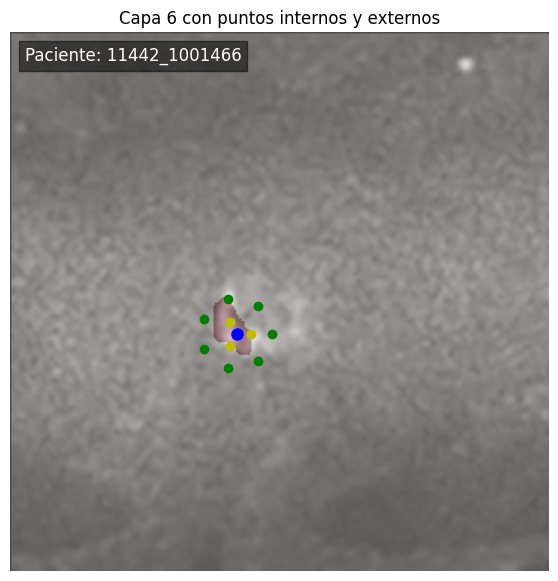

{'centroide': [5, 215, 161], 'puntos_internos': [(215, 171), (223, 156), (206, 156)], 'puntos_externos': [(215, 186), (234, 176), (239, 155), (225, 138), (204, 138), (190, 155), (195, 176)]}


In [ ]:
nodos_grafo = mostrar_secuencia_con_puntos_sin_mascara(id_paciente, dwi_path, mask_path, centroide)
print(nodos_grafo)

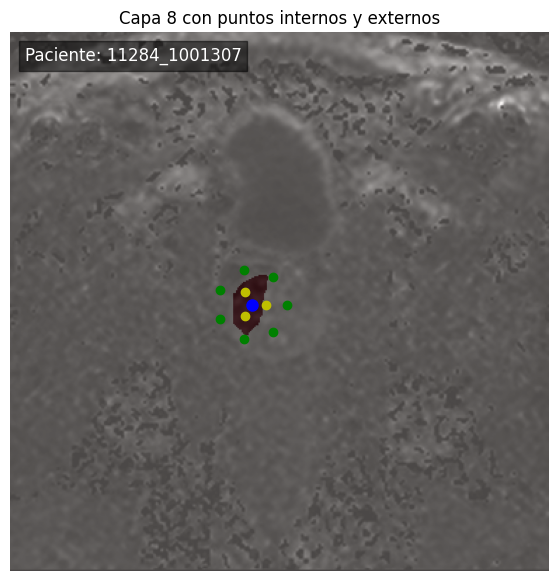

{'centroide': [7, 194, 172], 'puntos_internos': [(194, 182), (202, 167), (185, 167)], 'puntos_externos': [(194, 197), (213, 187), (218, 166), (204, 149), (183, 149), (169, 166), (174, 187)]}


In [ ]:
nodos_grafo = mostrar_secuencia_con_puntos_sin_mascara(id_paciente, dwi_path, mask_path, centroide)
print(nodos_grafo)

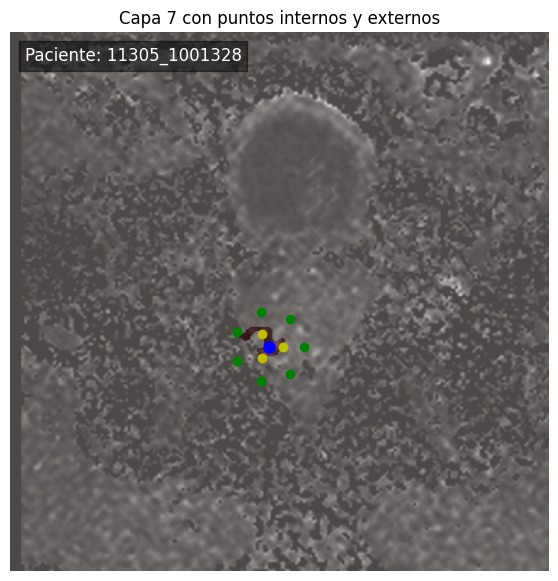

{'centroide': [6, 224, 184], 'puntos_internos': [(224, 194), (232, 179), (215, 179)], 'puntos_externos': [(224, 209), (243, 199), (248, 178), (234, 161), (213, 161), (199, 178), (204, 199)]}


In [ ]:
nodos_grafo = mostrar_secuencia_con_puntos_sin_mascara(id_paciente, dwi_path, mask_path, centroide)
print(nodos_grafo)

# **6. Parches**

In [ ]:
def visualizar_patches_con_puntos(dwi_path, mask_path, ubicaciones, patch_size=32):

  # Cargar imágenes
  dwi_img = sitk.ReadImage(dwi_path)
  mask_img = sitk.ReadImage(mask_path)
  dwi_data = sitk.GetArrayFromImage(dwi_img)
  mask_data = sitk.GetArrayFromImage(mask_img)

  # Extraer capa correspondiente al centroide
  capa = ubicaciones["centroide"][0] + 1
  dwi_layer = dwi_data[capa, :, :]
  mask_layer = mask_data[capa, :, :]

  # Obtener puntos internos y externos
  puntos = ubicaciones["puntos_internos"] + ubicaciones["puntos_externos"]
  tipos = ['interno'] * len(ubicaciones["puntos_internos"]) + ['externo'] * len(ubicaciones["puntos_externos"])

  # Parámetros del parche
  half = patch_size // 2

  # Visualización en subplots
  num_puntos = len(puntos)
  fig, axs = plt.subplots(num_puntos, 2, figsize=(6, 3 * num_puntos))

  for i, ((y, x), tipo) in enumerate(zip(puntos, tipos)):
    # --- Imagen general con punto y rectángulo ---
    axs[i, 0].imshow(dwi_layer, cmap='gray')
    axs[i, 0].imshow(mask_layer, cmap='Reds', alpha=0.3)
    color = 'yellow' if tipo == 'interno' else 'green'
    axs[i, 0].plot(x, y, 'o', color=color, markersize=6)

    # Rectángulo del parche
    top_left_x = x - half
    top_left_y = y - half
    rect = Rectangle((top_left_x, top_left_y), patch_size, patch_size,
                      linewidth=1.5, edgecolor='cyan', facecolor='none')
    axs[i, 0].add_patch(rect)

    axs[i, 0].set_title(f'Punto {i+1} ({tipo}) en capa {capa}')
    axs[i, 0].axis('off')

    # --- Parche ---
    y_min = max(y - half, 0)
    y_max = min(y + half, dwi_layer.shape[0])
    x_min = max(x - half, 0)
    x_max = min(x + half, dwi_layer.shape[1])

    patch = np.zeros((patch_size, patch_size), dtype=dwi_layer.dtype)
    patch_crop = dwi_layer[y_min:y_max, x_min:x_max]

    y_offset = half - (y - y_min)
    x_offset = half - (x - x_min)
    patch[y_offset:y_offset+patch_crop.shape[0], x_offset:x_offset+patch_crop.shape[1]] = patch_crop

    axs[i, 1].imshow(patch, cmap='gray')
    axs[i, 1].set_title(f'Parche {i+1}')
    axs[i, 1].axis('off')

  plt.tight_layout()
  plt.show()

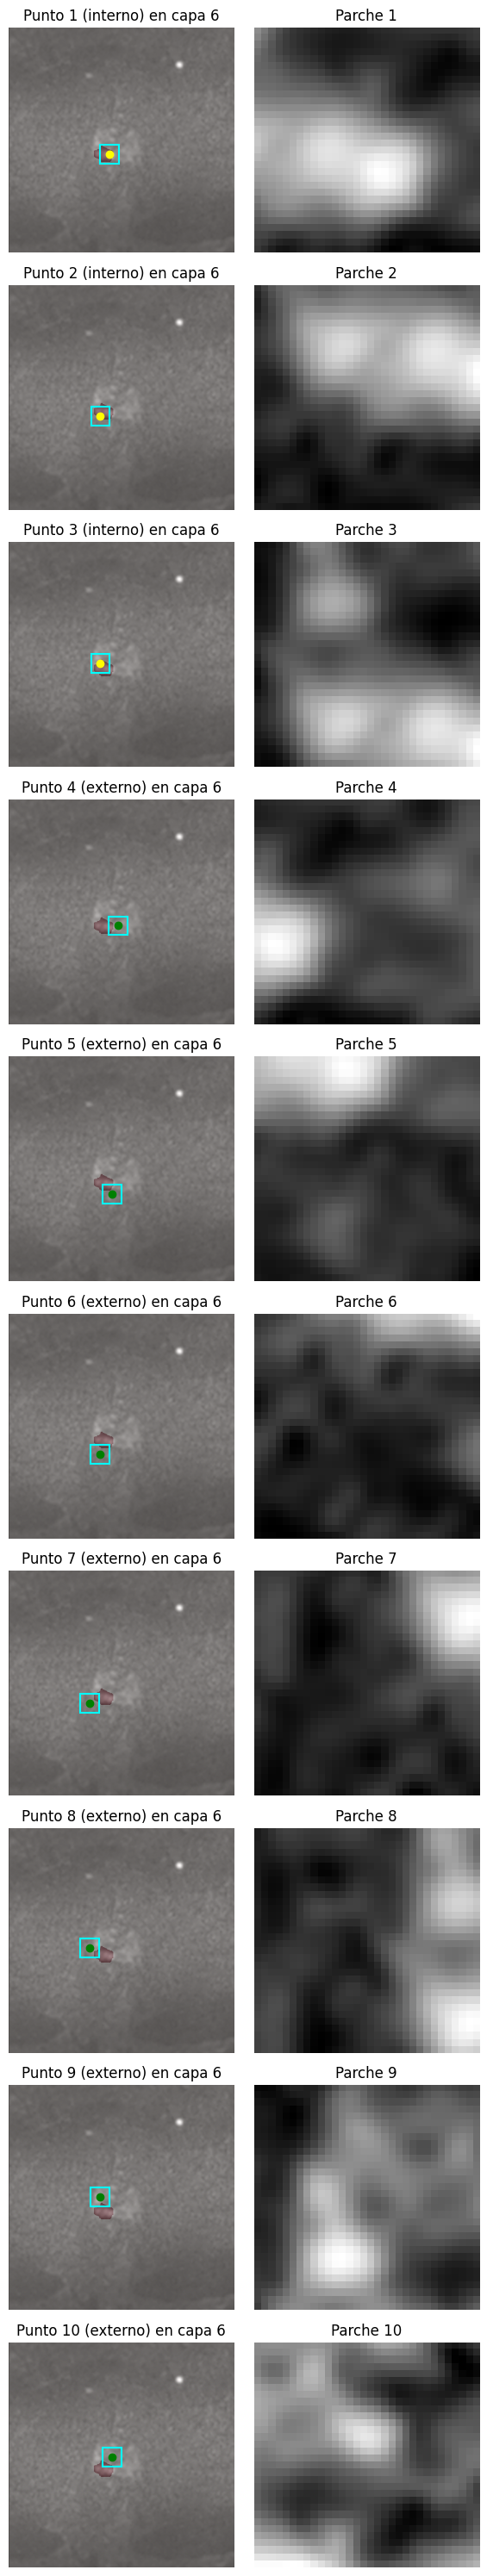

In [ ]:
visualizar_patches_con_puntos(dwi_path, mask_path, nodos_grafo)